In [190]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad

In [215]:
# pm and pf are the prior probabilities of a person being a male or female respectively.
# mu is the mean of the distribution, sigma is the standard deviation.


# This function defines the class conditional density of males.
def fm(x):
    mu, sigma = 5.8, 1
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)


# This function defines the class conditional density of females.
def ff(x):
    mu, sigma = 5.0, 1
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)
    
    
# This function defines the marginal probability f(X=x) = fm(x)*pm + ff(x)*pf    
def f(x, pm, pf):
    return fm(x)*pm + ff(x)*pf
    
    
# This is the posterior probability P(y=m|X=x) = f(X=x|y=m)*pm/f(X=x) (for males)
def qm(x, pm, pf):
    return fm(x)*pm/f(x,pm,pf)


# This is the posterior probability P(y=f|X=x) = f(X=x|y=f)*pf/f(X=x) (for females)
def qf(x, pm, pf):
    return ff(x)*pf/f(x,pm,pf)


# This function gives the decision boundary by equating the posteriors
def decision_boundary(pm, pf):
    region = np.linspace(0, 10, 10000)
    for x in region:
        if qf(x,pm,pf) - qm(x,pm,pf) <= 0.0001: # The difference should be ideally zero, but practically it'll be something small.
            return x

        
# This gives the error of the classifier. 
def error(pm, pf, decision_boundary):
    err_m = quad(fm, -np.inf, decision_boundary)[0]*pm # Proportion of males that were predicted to be females
    err_f = quad(ff, decision_boundary, np.inf)[0]*pf  # Proportion of females that were predicted to be males
    return err_m + err_f

In [229]:
# Prior probabilities pm = 0.5, pf = 0.5

pm = 0.5 ; pf = 0.5
db_case1 = round(decision_boundary(pm,pf),2)
error_case1 = error(pm, pf, db_case1)
print('Decision Boundary: X =', db_case1)
print('Error: ', error_case1)

Decision Boundary: X = 5.4
Error:  0.34457825838967593


[]

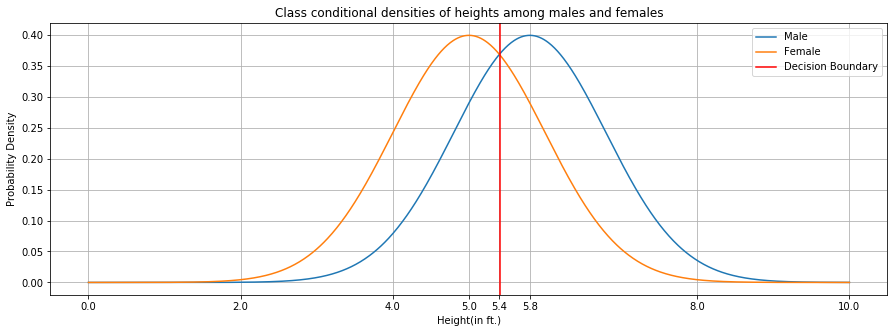

In [187]:
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(15,5))
plt.plot(x, fm(x))
plt.plot(x, ff(x))
plt.axvline(x=5.4, color='red')
plt.xticks([0, 2, 4, 5, 5.4, 5.8, 8, 10])
plt.grid(axis='both')
plt.legend(['Male', 'Female', 'Decision Boundary'])
plt.xlabel('Height(in ft.)')
plt.ylabel('Probability Density')
plt.title('Class conditional densities of heights among males and females')
plt.plot()

[]

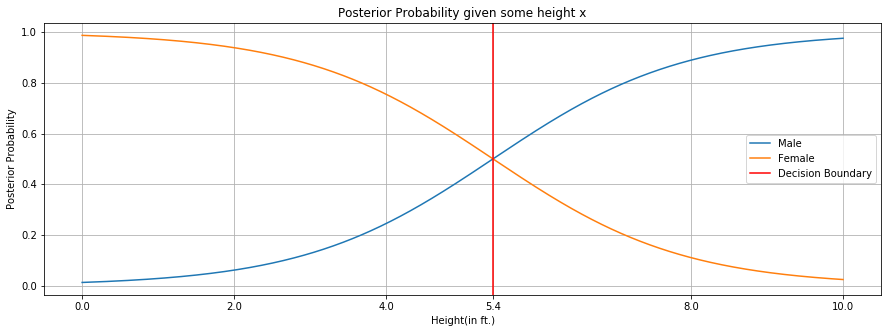

In [232]:
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(15,5))
plt.plot(x, qm(x, 0.5, 0.5))
plt.plot(x, qf(x, 0.5, 0.5))
plt.axvline(x=5.4, color='red')
plt.xticks([0, 2, 4, 5.4, 8, 10])
plt.grid(axis='both')
plt.legend(['Male', 'Female', 'Decision Boundary'])
plt.xlabel('Height(in ft.)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability given some height x')
plt.plot()

In [230]:
# Prior probabilities pm = 0.1, pf = 0.9

pm = 0.1 ; pf = 0.9
db_case1 = round(decision_boundary(pm,pf),2)
error_case1 = error(pm, pf, db_case1)
print('Decision Boundary: X =', db_case1)
print('Error: ', error_case1)

Decision Boundary: X = 8.15
Error:  0.09979604652806187


[]

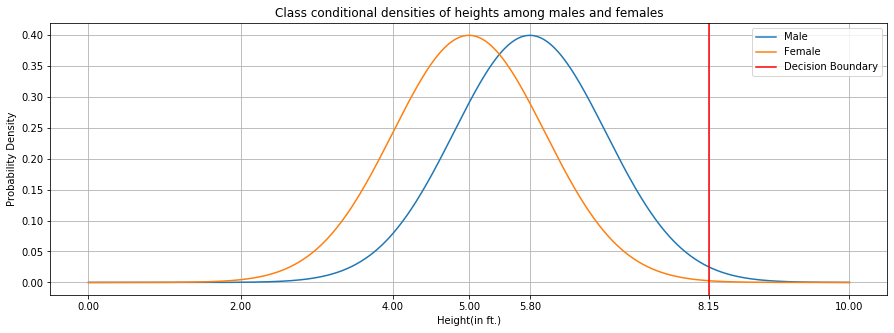

In [189]:
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(15,5))
plt.plot(x, fm(x))
plt.plot(x, ff(x))
plt.axvline(x=8.15, color='red')
plt.xticks([0, 2, 4, 5, 5.8, 8.15, 10])
plt.grid(axis='both')
plt.legend(['Male', 'Female', 'Decision Boundary'])
plt.xlabel('Height(in ft.)')
plt.ylabel('Probability Density')
plt.title('Class conditional densities of heights among males and females')
plt.plot()

Text(0.5, 1.0, 'Posterior probability given some height x')

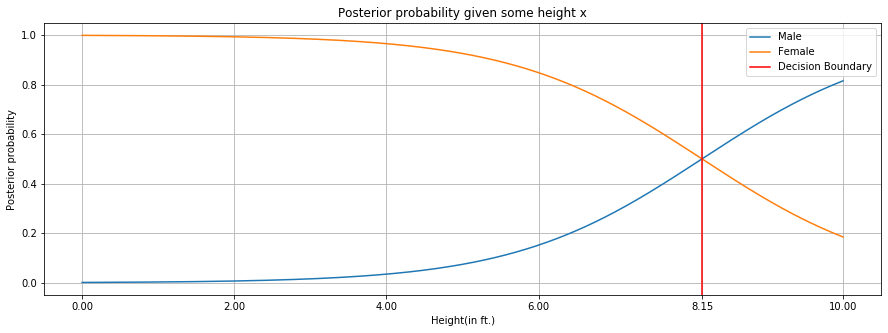

In [140]:
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(15,5))
plt.plot(x, qm(x, 0.1, 0.9))
plt.plot(x, qf(x, 0.1, 0.9))
plt.axvline(x=8.15, color='red')
plt.xticks([0, 2, 4, 6, 8.15, 10])
plt.grid(axis='both')
plt.legend(['Male', 'Female', 'Decision Boundary'])
plt.xlabel('Height(in ft.)')
plt.ylabel('Posterior probability')
plt.title('Posterior probability given some height x')

[]

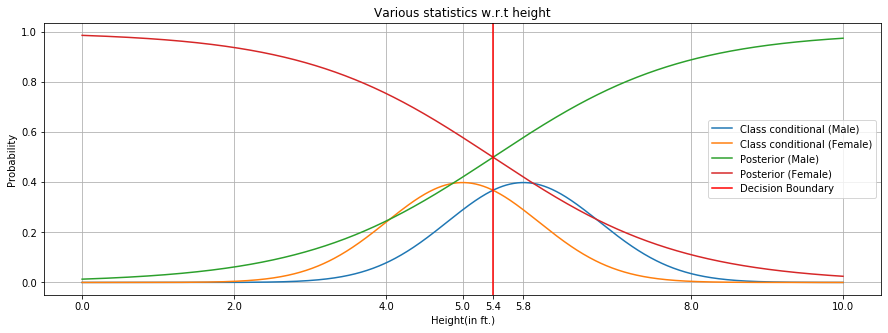

In [152]:
# x = np.linspace(0, 10, 1000)

# plt.figure(figsize=(15,5))
# plt.plot(x, fm(x))
# plt.plot(x, ff(x))
# plt.plot(x, qm(x, 0.5, 0.5))
# plt.plot(x, qf(x, 0.5, 0.5))
# plt.axvline(x=5.4, color='red')
# plt.xticks([0, 2, 4, 5, 5.4, 5.8, 8, 10])
# plt.grid(axis='both')
# plt.legend(['Class conditional (Male)', 'Class conditional (Female)', 'Posterior (Male)', 'Posterior (Female)', 'Decision Boundary'])
# plt.xlabel('Height(in ft.)')
# plt.ylabel('Probability')
# plt.title('Various statistics w.r.t height')



# plt.plot()

[]

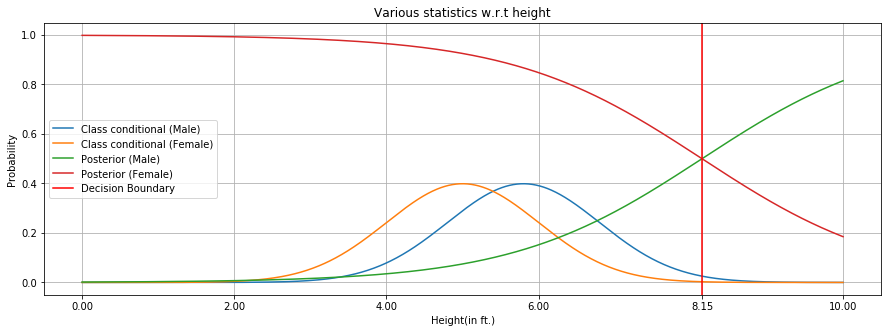

In [151]:
# x = np.linspace(0, 10, 1000)

# plt.figure(figsize=(15,5))
# plt.plot(x, fm(x))
# plt.plot(x, ff(x))
# plt.plot(x, qm(x, 0.1, 0.9))
# plt.plot(x, qf(x, 0.1, 0.9))
# plt.axvline(x=8.15, color='red')
# plt.xticks([0, 2, 4, 6, 8.15, 10])
# plt.grid(axis='both')
# plt.legend(['Class conditional (Male)', 'Class conditional (Female)', 'Posterior (Male)', 'Posterior (Female)', 'Decision Boundary'])
# plt.xlabel('Height(in ft.)')
# plt.ylabel('Probability')
# plt.title('Various statistics w.r.t height')

# plt.plot()